<h1><center>Practice of Large Scale Machine Learning - TP0 Titanic<center></h1>
<h2><center>ATHENS 2019<center></h2>

# Introduction

The goal of this TP (Travaux Pratiques) is to build a model which predicts whether a passenger of the Titanic would have survived. It is a binary classification problme because the output of the built model is either 0 (deceased) or 1 (survived). 

#### For any remark or suggestion, please feel free to contact us at: 
#### pascal.bianchi@telecom-paris.fr
#### nidham.gazagnadou@telecom-paris.fr

In [477]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/tp_avazu/data/'  # your new root path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [478]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
!ls

gdrive	sample_data


# The dataset

<font color="red">**Question:**
    <br>
    Load the csv file *'data_tp/titanic_train.csv'* into a dataframe. Use the function 'os.path.join()' to indicate the full path. 
</font>

In [0]:
full_path = os.path.join(root_path,"titanic_train.csv")
df = pd.read_csv(full_path)

<font color="red">**Question:**
    <br>
    Inspect the data, and show the first rows using the 'df.head()' method.
</font>

In [480]:
#NOTE: the default value for n is actually 5, so i could even ommit to specify it!!
df.head(n=5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### <font color="blue">Compute some preliminary statistics</font>
More information about DataFrames at:
<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

### <font color="blue">Titanic dataset</font>
<br>
Some columns' name are not self-explicit. For more detail about the meaning of the different columns:


https://www.kaggle.com/c/titanic/data

https://cran.r-project.org/web/packages/titanic/titanic.pdf

<font color="red">**Question:**
    <br>
    Use the '.describe()' method in order to answer the following questions:
    <br>
- What is the average age of the passengers?
    <br>
- How old is the oldest passenger?
    <br>
- What percentage of survivors among the passengers?
</font>

In [481]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Your answer here
 **1)** avarage age of passengers : 29,69

 **2)** How old is the oldest passenger ? 80

 **3**


### <font color="blue">Distribution of the data</font>
More info about *df.describe()* method at:
<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe

<font color="red">**Question:**
    <br>
    Compute and give the number of men and the number of survivors among the men using pandas' method "df.sum"
</font>

NB: The result of this expression (df[df['Sex']== "male" ]) is list of element where each element is either true or False; but python interpret False as 0 and true as 1 so we just need sum up in oder to have the total number that satisfies the condition

In [482]:
 print("the number of man is {}".format((df['Sex'] == "male").sum())) # Fill here

the number of man is 577


In [483]:
df2 =df[df['Sex']== "male" ] # Fill here
df2 = df2[df["Survived"] ==1]
print("the total number of passengers who survived is {}".format(df2["Survived"].sum(axis =0)))


the total number of passengers who survived is 109


Your answer here

**1)** the total number of men is 577

**2)** The total number of passengers who survived among the men is 109

<font color="red">**Question:**
    <br>
    Plot the histogram of ages and of classes. One can use the method "df.hist". Precise the name of the axes.
</font>

NB:The parameter bin of the hist method is number of group we want to have in the histogram.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

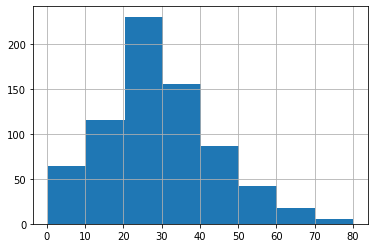

In [485]:
nb_bins = 8 # Fill here for the age histogram
df["Age"].hist(bins=nb_bins)

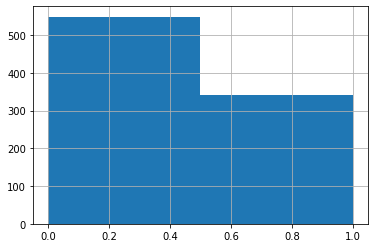

In [486]:
nb_bins = 2 # Fill here for the class histogram
df["Survived"].hist(bins=nb_bins)

# Missing data preprocessing

<font color="red">**Question:**
    <br>
    Estimate the number of missing data per column using the "df.count" method.
</font>

len(df) returns the number of rows of the dataframe
df.count() returns for each columns the number of non missing values

NB: we could also use : flights_missing = flights.isna() which returns a dataframe with the same dimessions but containing only boolean.
then we can apply mean,count on that dataframe

In [487]:
print(len(df) -df.count())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### <font color="blue">Using count method</font>

The *df.count* method "Count[s] non-NA cells for each column or row."
<br>
As explained in the documentation:
<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html#pandas.DataFrame.count

<font color="red">**Question:**
    <br>
    Indicate which columns are non-informative or that contain to many missing values and remove them using the "df.drop" method. Do not forget to set the parameter "inplace" to "True".
</font>

In [488]:
print(df.columns.values)
df.drop(columns=['Age','Cabin'], axis=1,inplace=True) # Fill here
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'SibSp' 'Parch' 'Ticket'
 'Fare' 'Embarked']


Your answer here

The columns **age** and **cabin** are non informative because because they contains too many missing values.

<font color="red">**Question:**
    <br>
    Using the "fillna()" method, create a new dataframe where NaN are replaced by the median of the corresponding column.
</font>

In [0]:
#is this feasible since the only column that have missing values is embarke and does not contains numerical values??

<font color="red">**Question:**
    <br>
    Verify that there are not missing data anymore using '.count()'. If there are still some, delete the corresponding lines with '.dropna()'.
</font>

In [490]:
df =df.dropna(axis=0)
print(len(df) -df.count())
#Since the length of the dataframe is equal to the total number of NOT a NaN -> there not missing values anymore!!

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Categorical variables encoding

<font color="red">**Question:**
    <br>
    Verify that 'Sex' and 'Embarked' are the only categorical variables. One could for instance make use of the "df.dtypes" method.
</font>

In [491]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

<font color="red">**Question:**
    <br>
    With the help of the Pandas' function "pd.get_dummies" or of (it is a bit more difficult) scikit learn methods "LabelEncoder" and "OneHotEncode", cast these columns into one-hot variables. Check the scikit learn document for more information:
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
<font>

**NB** In the function pd.get_dummies() the attribute drop_first=True means that we will use a OHE of shorter dimenssion eg: for the attribute embarked, if embarked_s = 0 and embarked_q =0 -> embarked_c should be 1

In [492]:
print(df["Embarked"].unique())
sex = pd.get_dummies(df,columns=["Sex"], drop_first=True) # Fill here for sex feature
embark = pd.get_dummies(df,columns=["Embarked"], drop_first=True) # Fill here for embarked feature
embark.head()
#sex.head()

['S' 'C' 'Q']


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,0,1


In [0]:
embark.drop(columns=["PassengerId","Survived","Pclass","Name","SibSp","Parch","Ticket","Fare","Sex"], inplace=True)
sex.drop(columns=["PassengerId","Survived","Pclass","Name","SibSp","Parch","Ticket","Fare","Embarked"], inplace=True)
df.drop(columns=["Sex","Embarked"], inplace=True) # Columns to delete

<font color="red">**Question**:
    <br>
    Delete (if not already done) the categorical columns 'Sex' and 'Embarked'. The final DataFrame should only contain the one-hot enconding of the 'Sex' and 'Embarked' columns. 
<font>

In [494]:

df = pd.concat([df,sex,embark], axis=1) # Fill here to concatenate df and the new encoded columns
df.head()
#sex.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,1,0,1


# Logistic regression

In [495]:
# Output and design matrix
#conveet all the string values into int or float
for column_name,values in df.items():
  if values.dtype=="object":
   labels,unique = values.factorize()
   df[column_name] = labels

y = df.Survived.values # output
X = df.drop(columns="Survived").values # design matrix
feature_names = df.drop(columns="Survived").columns
print(y[:5])
print(X[:5,:])

[0 1 1 1 0]
[[ 1.      3.      0.      1.      0.      0.      7.25    1.      0.
   1.    ]
 [ 2.      1.      1.      1.      0.      1.     71.2833  0.      0.
   0.    ]
 [ 3.      3.      2.      0.      0.      2.      7.925   0.      0.
   1.    ]
 [ 4.      1.      3.      1.      0.      3.     53.1     0.      0.
   1.    ]
 [ 5.      3.      4.      0.      0.      4.      8.05    1.      0.
   1.    ]]


<font color="red">**Question:**
    <br>
    Use scikit-learn and the LogisticRegression class of sklearn.linear_model in order to train a classifier on the training data. Try to justify the choice of your parameters.
</font>

For futher information, one can read the documentation: 
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression 

In [497]:
## You might get a warning about the solver. You should precise one like *lbfgs*
## And one about number of iterations, so increase *max_iter* until convergence.
classifier = LogisticRegression(C=1e15,verbose=3) # Set C=1e15
classifier.fit(X,y)
print(classifier.coef_[0])

[LibLinear][-1.17998594e-01 -8.44818460e-01  1.18378298e-01 -2.48621915e-01
 -8.74475958e-02 -3.47996771e-04  2.25896566e-03 -2.73941632e+00
 -2.13282695e-01 -4.53269527e-01]


# Performance evaluation

<font color="red">**Question:**
    <br>
    Using the "train_test_split" function of the module sklearn.model_selection, divide the DataFrame into a training DataFrame and a test one (one will take 90% of the dataset for the training set and 10% for the test set).
</font>

For futher information, one can read the documentation: 
<br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

<font color="red">**Question:**
    <br>
    Which parameter would make our split repoducible?
</font>

In [0]:
from sklearn.model_selection import train_test_split
#NB since train_size id not specified, it's assumed to be the complemetìnt of the test_size.
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.10, random_state=42)

Your answer here

in order to allow a reproducible split, we need to specify in the split function random_state = int !!

<font color="red">**Question:**
    <br>
    Train the model on the training set using one of the algorithms seen before.
</font>

In [499]:
classifier = LogisticRegression(C=1e15,verbose=2)
classifier.fit(Xtrain,ytrain)

[LibLinear]

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=2,
                   warm_start=False)

### Confusion matrix/Matrice de confusion

The confusion matrix is defined as/La matrice de confusion est
$$
\begin{pmatrix}
TP & FP \\ FN & TN
\end{pmatrix}
$$
where
- TP = number of true positives (true value is 1, prediciton is 1)
- FP = number of false positives (true value is 0, prediciton is 1: type I error or "false alarm")
- FN = number of false negatives (true value is 1, prediciton is 0: type II error or "miss")
- TN = number of true positives (true value is 0, prediciton is 0)

<font color="red">**Question:**
    <br>
    With the help of the "confusion_matrix" function from the module sklearn.metrics, compute the confusion matrix in order to evaluate the performance of the classifier.
</font>

In [500]:
from sklearn.metrics import confusion_matrix
hard = classifier.predict(Xtest)
confusion_matrix_ = confusion_matrix(ytest, hard)
print(confusion_matrix_)

[[46 12]
 [ 5 26]]


<font color="red">**Question:**
    <br>
    Complete the last two lines and compare both confusion matrices.
</font>

In [501]:
p = (ytest==1)      # number of positive outputs
n = (ytest==0)      # number of negative outputs

t = (ytest==hard)   # Entries: 1 if prediction is correct
f = (ytest!=hard)   # Entries: 1 if prediction is wrong

TP = (t & p).sum()  # number of true positive predictions  
TN = (n&t).sum()            # number of true negative predictions
FP =  (p&f).sum()           # number of false positive predictions
FN = (n&f).sum()          # number of false negative predictions

confusion_matrix_handmade = np.array([[TP, FP],[FN, TN]])
print(confusion_matrix_handmade)

[[26  5]
 [12 46]]


Your answer here

we can norice the 2 confusion matrices are inverted.

<font color="red">**Question:**
    <br>
    Estimate:
- the probability of false alarm (or false positive rate), i.e. the probability of predicting '1' when the true label is '0'
- the sensitivity (or true positive rate), i.e. the probability of predicting '1' when the true label is '1' 
</font>

In [502]:
proba_false_alarm = FP/(TN+FP)
sensitivity = TP/(TP+FN)
print(proba_false_alarm,sensitivity)

0.09803921568627451 0.6842105263157895


Your answer here

**1)** proba_false_alarm = 0.09803921568627451 

**2)** sensitivy = 0.6842105263157895

## ROC curve

If one reduces the threshold, the number or false alarms increases as is the power.
The ROC curve is the set of the pairs (pfa, power) for all possible thresholds.

<font color="red">**Question:**
    <br>
    Using the "roc_curve" function of the sklearn.metrics module, plot the ROC curve ('sensitivity' vs 'proba_false_alarm'). Then compute the AUC using 'roc_auc_score' from sklearn.metrics.
</font>

In [0]:
from sklearn.metrics import roc_curve,roc_auc_score#, ...

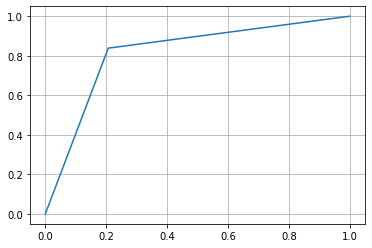

In [504]:
fpr, tpr, thresholds = roc_curve(ytest,hard)
#soft = ...

plt.plot(fpr,tpr )
plt.grid()

In [505]:
# Compute AUC here
print("the AUC is {}".format(roc_auc_score(ytest,hard)))

the AUC is 0.8159065628476085


Good Job ! :-)